In [5]:
import numpy as np
import pandas as pd 
from skimage.data import imread
from skimage import draw
import matplotlib.pyplot as plt
import os
import pdb
from sklearn.cluster import KMeans
import pickle

In [6]:
outfile = '/floyd/input/airbus/box_data.pickle'

with open(outfile, 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    data = pickle.load(f)

box_image_ids = data['box_image_ids']
L1 = data['L1']
L2 = data['L2']
R0 = data['C0']  # accidently switched when saved
C0 = data['R0'] # accidently switched when saved
theta = data['theta']
all_image_ids = data['all_image_ids']
num_ships = data['num_ships']

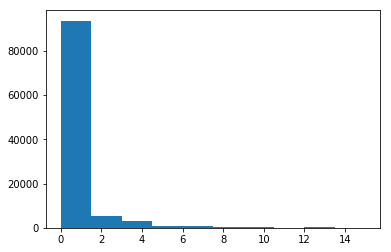

In [7]:
plt.hist(num_ships);

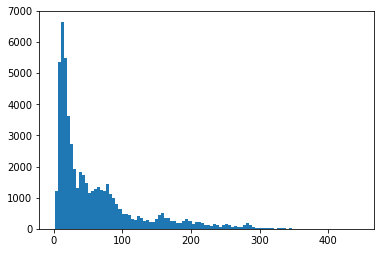

In [9]:
plt.hist(L1,bins=100);

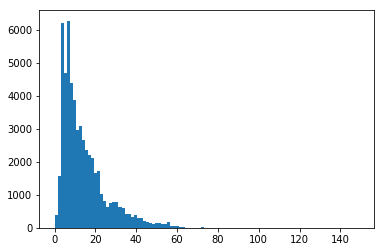

In [10]:
plt.hist(L2,bins=100);

In [16]:
theta[:10]

array([-1.54110209, -0.98279372, -1.06369782,  1.47112767,  1.32581766,
       -0.27829966,  1.29249667,  1.42889927,  1.40564765, -0.85670563])

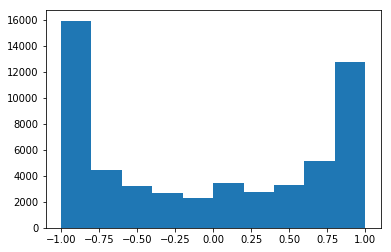

In [14]:
plt.hist(np.sin(theta));

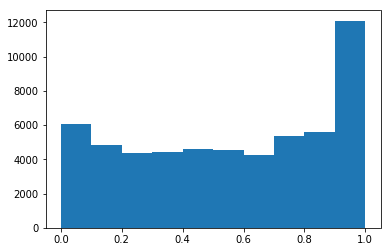

In [15]:
plt.hist(np.cos(theta));

(array([  269., 12470., 16892., 10947.,  5866.,  3800.,  2342.,  1429.,
         1114.,   901.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

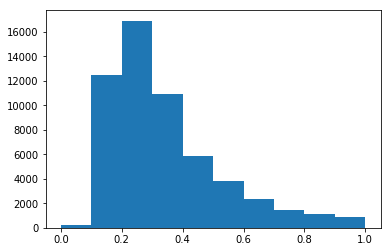

In [17]:
aspect_ratio = L2/L1
#aspect_ratio[aspect_ratio == np.inf] = np.nan
plt.hist(aspect_ratio)

In [18]:
sin_theta = np.sin(theta)
cos_theta = np.cos(theta)
x = np.stack((L1,L2,L1*sin_theta,L1*cos_theta),axis=1)

In [19]:
kmeans = KMeans(n_clusters=9, random_state=0, n_init=20, max_iter=300).fit(x)

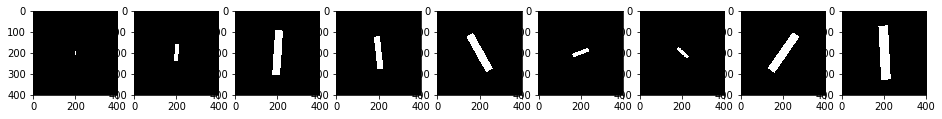

In [21]:
fig,ax = plt.subplots(1,9,figsize=(16,4))
for i,xi in enumerate(kmeans.cluster_centers_):
    img = np.zeros((400,400))
    theta_i = xi[2]/xi[3]
    L1_i = xi[0]
    L2_i = xi[1]
    R = np.array([[np.cos(theta_i),-np.sin(theta_i)],[np.sin(theta_i),np.cos(theta_i)]])
    box = 0.5*np.array([[L1_i,L2_i],[L1_i,-L2_i],[-L1_i,-L2_i],[-L1_i,L2_i]]).T
    box_rot = np.dot(R,box)
    rr, cc = draw.polygon(200+box_rot[0,:],200+box_rot[1,:],shape=(400,400))    
    img[rr,cc] = 1
    #ax[i//5,i%5].imshow(img,cmap='gray')
    ax[i].imshow(img,cmap='gray')

plt.show()

In [33]:
L1_k = kmeans.cluster_centers_[:,0]
L2_k = kmeans.cluster_centers_[:,1]
theta_k = kmeans.cluster_centers_[:,2]/kmeans.cluster_centers_[:,3]
sin_k = np.sin(theta_k)
cos_k = np.cos(theta_k)
#outfile = '../../data/kmeans_results.npz'
#np.savez(outfile,L1_k=L1_k,L2_k=L2_k,theta_k=theta_k)
for i in range(9):
    print("{:.0f},{:.0f},{:.6f},{:.6f}".format(L1_k[i],L2_k[i],sin_k[i],cos_k[i]))

19,7,0.093938,0.995578
81,19,-0.061921,0.998081
210,37,0.064325,-0.997929
154,28,-0.106220,-0.994343
192,37,0.489778,0.871847
80,18,0.931690,-0.363255
66,15,-0.745050,-0.667009
206,39,-0.570183,0.821518
255,45,-0.054288,-0.998525
